In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/nuthankumar/Downloads/estonia-passenger-list.csv.xls')

In [3]:
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [4]:
AGE = data['Age'].values
cage = []
for i in AGE:
    if i<=16:
        cage.append('child')
    elif i<=60:
        cage.append('adult')
    else:
        cage.append('old person')

In [5]:
data['Age Category'] = pd.DataFrame(cage)

In [6]:
data

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age Category
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0,old person
1,2,Estonia,LEA,AALISTE,F,22,C,0,adult
2,3,Estonia,AIRI,AAVASTE,F,21,C,0,adult
3,4,Sweden,JURI,AAVIK,M,53,C,0,adult
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0,adult
...,...,...,...,...,...,...,...,...,...
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0,adult
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1,adult
986,987,Sweden,ENN,QUNAPUU,M,77,P,0,old person
987,988,Sweden,LY,GUNAPUU,F,87,P,0,old person


Ratio of age category survival rate

In [7]:
age_cat = set(list(data['Age Category'].values))

In [8]:
dic = {}
for i in age_cat:
    dic[i] = len(data[(data['Age Category']==i) & (data['Survived']==1)].values)/len(data[data['Age Category']==i].values)

In [9]:
dic

{'old person': 0.02252252252252252,
 'child': 0.15789473684210525,
 'adult': 0.17245989304812834}

<BarContainer object of 3 artists>

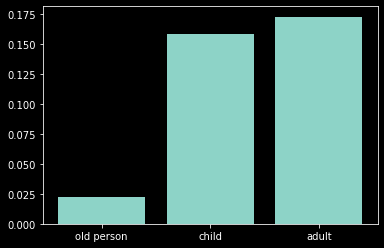

In [10]:
plt.bar(dic.keys(), dic.values())

In [11]:
dic = {}
for i in ['M', 'F']:
    dic[i] = len(data[(data['Sex']==i) & (data['Survived']==1)].values)/len(data[data['Sex']==i].values)

In [12]:
dic

{'M': 0.21868787276341947, 'F': 0.05555555555555555}

<BarContainer object of 2 artists>

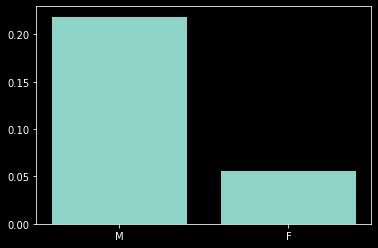

In [13]:
plt.bar(dic.keys(), dic.values())

In [14]:
dic = {}
for i in set(list(data['Country'].values)):
    dic[i] = len(data[(data['Country']==i)& (data['Survived']==1)].values)/len(data[data['Country']==i].values)

<BarContainer object of 16 artists>

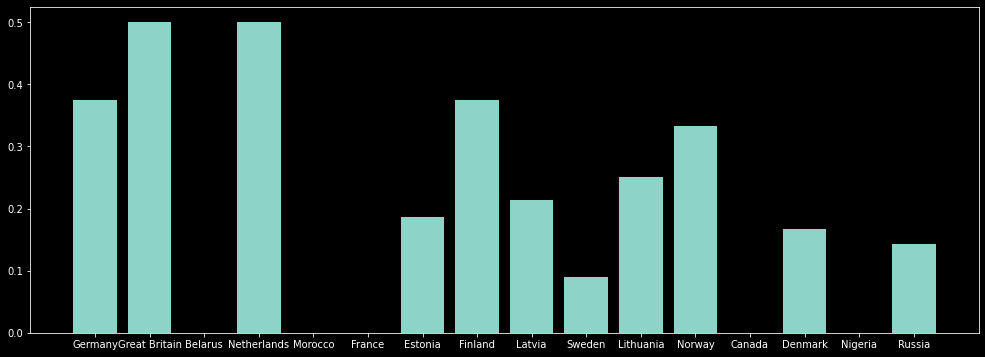

In [15]:
plt.figure(figsize=(17,6))
plt.bar(dic.keys(), dic.values())

In [16]:
dic={}
for i in set(list(data['Country'].values)):
    t=[]
    for j in set(list(data['Age Category'].values)):
        t.append(len(data[(data['Country']==i) & (data['Survived']==1) & (data['Age Category']==j)].values)/len((data[data['Country']==i]).values))
    dic[i]=t

In [17]:
k = dic.values()
k = list(k)

In [18]:
k = np.array(k)

In [19]:
bars1 = k[:,0]
bars1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00290698, 0.        , 0.        , 0.00727273,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [20]:
bars2 = k[:,1]
bars2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00581395, 0.        , 0.        , 0.        ,
       0.        , 0.11111111, 0.        , 0.        , 0.        ,
       0.        ])

In [21]:
bars3 = k[:,2]

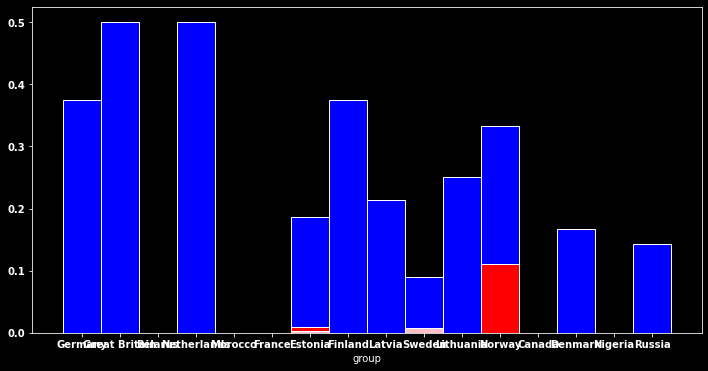

In [22]:
from matplotlib import rc

 
# y-axis in bold
rc('font', weight='bold')
 

 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
 
# Names of group and bar width
names = set(list(data['Country'].values))
barWidth = 1
plt.figure(figsize=(12,6))
# Create brown bars
plt.bar(r, bars1, color='pink', edgecolor='white', width=barWidth,label='Adults')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='red', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='blue', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")

# Show graphic
plt.show()

Family class

In [23]:
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age Category
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0,old person
1,2,Estonia,LEA,AALISTE,F,22,C,0,adult
2,3,Estonia,AIRI,AAVASTE,F,21,C,0,adult
3,4,Sweden,JURI,AAVIK,M,53,C,0,adult
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0,adult


In [24]:
last = data['Lastname'].values
len(last)- len(set(last))

215

In [25]:
len(last)

989

We can deduce there are families in the data

In [26]:
df = pd.DataFrame(data)

In [27]:
lastnamedic = df.groupby(['Lastname']).groups 

In [28]:
lastnamedic

{'AADLI': [0], 'AALISTE': [1], 'AAVASTE': [2], 'AAVIK': [3], 'ABERG': [973, 974, 975], 'ABERG PERSSON': [972], 'AHLSTROM': [4, 5, 6], 'AHMAN': [7], 'AINSALU': [8], 'ALDRIN': [9, 10], 'ALEKSEEVA': [11], 'ALENDER': [12], 'ALEP': [13], 'ALLA': [14, 15], 'ALLAS': [16], 'ALM': [17, 18], 'ALMQUIST': [19], 'ANDERLJUNG': [20], 'ANDERSON': [21], 'ANDERSSON': [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 'ANDREJEVS': [37], 'ANDRESSON': [38], 'ANNUS': [39, 40], 'ANTUK': [41], 'APELMAN': [42, 43], 'ARAK': [44], 'ARRO': [45], 'ARTJUHHOV': [46], 'ARULA': [47], 'ASER': [48], 'ASKERUP': [49], 'ASPLUND': [50], 'ASPMAN': [51, 52], 'ASTROM': [976, 977, 978], 'ATTERFORS': [53], 'AUGUSTIN': [55], 'AUN': [56], 'AUSMEES': [57, 58], 'AUVINEN': [59], 'AVEKUKK': [60], 'AXELSSON': [61], 'BARASINSKI': [62], 'BARNEY': [63], 'BEKKEWOLD': [64], 'BELZETSKAJA': [65], 'BEN HAMOU': [66], 'BEN TOUNSI': [67], 'BERENDSEN': [68], 'BERG': [69], 'BERGENDAHL': [70], 'BERGENHEIM': [71, 72], 'BERGKVIST': [73, 74]

In [29]:
df

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age Category
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0,old person
1,2,Estonia,LEA,AALISTE,F,22,C,0,adult
2,3,Estonia,AIRI,AAVASTE,F,21,C,0,adult
3,4,Sweden,JURI,AAVIK,M,53,C,0,adult
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0,adult
...,...,...,...,...,...,...,...,...,...
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0,adult
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1,adult
986,987,Sweden,ENN,QUNAPUU,M,77,P,0,old person
987,988,Sweden,LY,GUNAPUU,F,87,P,0,old person


In [30]:
# Showing an example for the family most possibly
df[df['Lastname']=='ASTROM']

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age Category
976,977,Sweden,NILS AKE,ASTROM,M,64,P,0,old person
977,978,Sweden,SIGNE ANN-BRITT,ASTROM,F,56,P,0,adult
978,979,Sweden,STEN LEONARD,ASTROM,M,73,P,0,old person


In [31]:
chit=[]
for i in data.Lastname:
    if len(lastnamedic[i])>1:
        chit.append(1)
    else:
        chit.append(0)

In [32]:
data['Family'] = chit

In [33]:
data.head(1)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age Category,Family
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0,old person,0


In [34]:
dic={}
for i in [1,0]:
    dic[i]=len(data[(data['Family']==i) & (data['Survived']==1)].values)/len((data[data['Family']==i] ).values)

<BarContainer object of 2 artists>

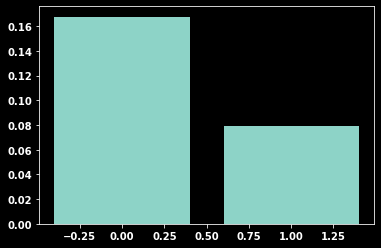

In [35]:
plt.bar(dic.keys(),dic.values())

Logistics regrssion

In [36]:
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age Category,Family
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0,old person,0
1,2,Estonia,LEA,AALISTE,F,22,C,0,adult,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0,adult,0
3,4,Sweden,JURI,AAVIK,M,53,C,0,adult,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0,adult,1


In [37]:
df = data 

In [38]:
df = df.drop(columns=['PassengerId','Firstname','Lastname'])

In [39]:
df.head()

,Country,Sex,Age,Category,Survived,Age Category,Family
0,Sweden,M,62,P,0,old person,0
1,Estonia,F,22,C,0,adult,0
2,Estonia,F,21,C,0,adult,0
3,Sweden,M,53,C,0,adult,0
4,Sweden,F,55,P,0,adult,1


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])


In [42]:
df['Category'] = LabelEncoder().fit_transform(df['Category'])
df['Age Category'] = LabelEncoder().fit_transform(df['Age Category'])
df['Country'] = LabelEncoder().fit_transform(df['Country'])

In [43]:
X = df.drop(columns=['Survived'], axis=1).values
y = df['Survived'].values

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=64)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log=LogisticRegression()

In [50]:
log.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_hat=log.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print('The score of the model is:',accuracy_score(y_hat,y_test))

The score of the model is: 0.851010101010101


In [54]:
X=df.drop(columns=['Survived','Family'],axis=1).values
y=df['Survived'].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [56]:
log.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_hat2=log.predict(X_test)

In [58]:
print('The accuracy score without adding the new Family coulumn is:',accuracy_score(y_hat2,y_test))

The accuracy score without adding the new Family coulumn is: 0.8532110091743119


Deep learning model with keras

In [62]:
X_train.shape[1]

5

In [68]:
from keras import models, layers
from keras.layers import Dense

In [91]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu', input_dim=(5)))
model.add(keras.layers.Dense(64, activation = 'relu')),
model.add(keras.layers.Dense(32, activation = 'relu')),
model.add(keras.layers.Dense(1, activation = 'sigmoid'))


In [92]:
model.compile(loss= 'binary_crossentropy',
optimizer = 'adam',
metrics = ['acc'])

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               768       
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,137
Trainable params: 11,137
Non-trainable params: 0
_________________________________________________________________


In [95]:
r = model.fit(X_train, y_train, batch_size = 32, epochs = 100,
                validation_data = (X_test, y_test))
                

Epoch 1/100
21/21 [==============================] - 0s 3ms/step - loss: 0.3322 - acc: 0.8656 - val_loss: 0.3433 - val_acc: 0.8532
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3331 - acc: 0.8671 - val_loss: 0.3439 - val_acc: 0.8532
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3354 - acc: 0.8656 - val_loss: 0.3552 - val_acc: 0.8410
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3284 - acc: 0.8656 - val_loss: 0.3425 - val_acc: 0.8532
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3311 - acc: 0.8686 - val_loss: 0.3599 - val_acc: 0.8532
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3509 - acc: 0.8671 - val_loss: 0.3472 - val_acc: 0.8532
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3324 - acc: 0.8656 - val_loss: 0.3466 - val_acc: 0.8532
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3324 - a